## Detectron2 - Object Detection with PyTorch

Detectron2 is Facebook's new vision library that allows us to easily create object detection, instance segmentation, keypoint detection and panoptic segmentation models.

Steps to follow:

<pre>

1) Install requirements - pyyaml, torchvision, scikit-learn, open-cv, etc.
2) Install Detectron2 library
3) Test inference with a pre-trained model with Detectron2
4) Train a custom model with new (custom) dataset
	- Prepare training data as per Detectron2's standard format
	- Registered data-catalog and get metadata-catalog
5) Fine-tuned pre-trained model with Detectron2 using DefaultTrainer or CustomTraner
	- Get pre-trained model and weights
	- Set necessary configuration
	- Augment dataset (optional)
	- Use custom dataset mapper only for CustomTrainer
	- Set output number of classes
6) Train the pre-trained model with DefaultTrainer/CustomTrainer
7) Evaluate the re-trained model
8) Save the re-trained model and configuration
9) Inference

</pre?>

#### Install Detectron2

In [ ]:
# Installation on Google Colab
# =============================
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime


In [4]:
# Installation on a local machine
# ================================
! pip install torchvision

# Note: This will install both torch and torchvision.

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.1 MB 1.6 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 3.0 MB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.1 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 0.6/1.1 MB 3.1 MB/s eta 0:00:01
     ---------------------------- ----------- 0.8/1.1 MB 3.4 MB/s eta 0:00:01
     ---------------------------------- ----- 1.0/1.1 MB 3.5 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 3.6 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
     --------------------------------------- 0.4/192.3 MB 11.2 MB/s eta 0:00:18
     ---------------------------------------- 0.7/192.3 MB 9.3 MB/s eta 0:00:21
     ---------------------------------------- 0.9/192.3 MB 7.2 MB/s eta 

In [1]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  2.1 ; cuda:  cpu


In [2]:
import cv2

In [9]:
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# Build Detectron2 from Source
#===============================
! python -m pip install "git+https://github.com/facebookresearch/detectron2.git"
# (add --user if you don't have permission)

# Or, to install it from a local clone:
# ! git clone https://github.com/facebookresearch/detectron2.git
# ! python -m pip install -e detectron2

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime



  Cloning https://github.com/facebookresearch/detectron2.git to c:\users\user\appdata\local\temp\pip-req-build-ybp87_mi
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/1.3 MB 3.3 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.3 MB 4.7 MB/s eta 0:00:01
     -------------------------- ------------- 0.9/1.3 MB 6.9 MB/s eta 0:00:01
     ------------------------------- -------- 1.1/1.3 MB 6.1 MB/s eta 0:00:01
     ------------------------------------- -- 1.2/1.3 MB 5.6 MB/s eta 0:0

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\USER\AppData\Local\Temp\pip-req-build-ybp87_mi'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [17]:
import detectron2

print("detectron2:", detectron2.__version__)

detectron2: 0.6


In [3]:
# Inference with a pre-trained model
# ===================================
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
# ! wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("000000439715.jpg")

# Create config
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
# https://github.com/facebookresearch/detectron2/blob/main/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

# manually download pretrained model and weights: https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md

# cfg = get_cfg()
# cfg.MODEL.DEVICE = "cpu"
# cfg.DATASETS.TRAIN = ("category_train",)
# cfg.DATASETS.TEST = ()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.WEIGHTS = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
# cfg.DATALOADER.NUM_WORKERS = 0
# cfg.SOLVER.IMS_PER_BATCH = 8
# cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
# cfg.SOLVER.MAX_ITER = 25000
# cfg.SOLVER.STEPS = []
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6

d:\mlenv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imshow('Object Detection', v.get_image()[:, :, ::-1])

# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
  
# closing all open windows 
cv2.destroyAllWindows() 

### Train on a custom dataset

To train a model on a custom data-set, we need to register our data-set to use the predefined data loaders.
Registering a data-set can be done by creating a function that returns all the needed information about the data as a list and passing the result to DatasetCatalog.register.


In [1]:
import os

os.chdir('../.')

%pwd

'd:\\work\\.ghorai\\certification-courses\\2022-iNeuron-Intelligence\\assignments\\DL_Practical\\assignment6'

In [2]:
import sys
sys.path.append('src')
%pwd

'd:\\work\\.ghorai\\certification-courses\\2022-iNeuron-Intelligence\\assignments\\DL_Practical\\assignment6'

In [3]:
import pandas as pd
import numpy as np
from detectron2.structures import BoxMode

# write a function that loads the dataset into detectron2's standard format

def get_detectron2data_dicts(img_dir):
    annos = pd.read_csv(os.path.join(img_dir, img_dir.split("/")[-1]+'_labels.csv'))

    dataset_dicts = []

    for ix, anno in annos.iterrows():
        record = {}
        record["file_name"] = os.path.join(img_dir, anno['filename'])
        record['image_id'] = ix
        record["height"] = anno['height']
        record["width"] = anno['width']

        class_name = anno['class']
        if class_name == 'cat':
            catid = 0
        else:
            catid = 1

        min_x = anno['xmin']
        min_y = anno['ymin']
        max_x = anno['xmax']
        max_y = anno['ymax']

        bbox = [(min_x + 0.5, max_y + 0.5), (max_x + 0.5, max_y + 0.5), (max_x + 0.5, min_y + 0.5), (min_x + 0.5, min_y + 0.5)]
        poly = [p for x in bbox for p in x]

        obj = {
            "bbox": [min_x, min_y, max_x, max_y],
            "bbox_mode": BoxMode.XYXY_ABS,
            "segmentation": [poly],
            "category_id": catid,
        }
        record["annotations"] = [obj]
        dataset_dicts.append(record)

    return dataset_dicts


In [4]:
from detectron2.data import DatasetCatalog, MetadataCatalog

data_dir = "research/data/data_split/"  # change data path 

# custom data preparation for detectron2 model: https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html

for d in ["train", "valid"]:
    DatasetCatalog.register(data_dir+d, lambda: get_detectron2data_dicts(data_dir+d))
    MetadataCatalog.get(data_dir+d).set(thing_classes = ["cat", "dog"])


In [5]:
training_metadata = MetadataCatalog.get(data_dir+"train")
training_metadata

namespace(name='artifacts/data_split/train', thing_classes=['cat', 'dog'])

In [5]:
import random
import cv2

from detectron2.utils.visualizer import Visualizer

# To verify the dataset is in correct format, let's visualize the annotations of randomly selected samples in the training set:
dataset_dicts = get_detectron2data_dicts(data_dir+"train")

for dd in random.sample(dataset_dicts, 3):
    img = cv2.imread(dd["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=training_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(dd)
    # visualize
    cv2.imshow('Training dataset', out.get_image()[:, :, ::-1])
    # waits for user to press any key 
    # (this is necessary to avoid Python kernel form crashing) 
    cv2.waitKey(0)
    # closing all open windows 
    cv2.destroyAllWindows() 


In [6]:
dd

{'file_name': 'artifacts/data_split/train\\pug_163.jpg',
 'image_id': 1838,
 'height': 300,
 'width': 275,
 'annotations': [{'bbox': [84, 31, 212, 150],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'segmentation': [[84.5, 150.5, 212.5, 150.5, 212.5, 31.5, 84.5, 31.5]],
   'category_id': 1}]}

#### Lastly, the pre-trained model can be fine-tuned for the new data-set using the DefaultTrainer

In [12]:
from detectron2.config import get_cfg
from detectron2 import model_zoo


cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("research/data/data_split/train",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # two class (cat and dog)

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
os.makedirs('src/Detectron2/output', exist_ok=True)

In [8]:
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/25 14:34:53 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:49, 3.57MB/s]                              
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due t

[12/25 14:35:43 d2.engine.train_loop]: Starting training from iteration 0


d:\mlenv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/25 14:48:49 d2.utils.events]:  eta: 3:06:03  iter: 19  total_loss: 2.234  loss_cls: 1.067  loss_box_reg: 0.4056  loss_mask: 0.6897  loss_rpn_cls: 0.02436  loss_rpn_loc: 0.009002    time: 39.8429  last_time: 30.9159  data_time: 0.4572  last_data_time: 0.0037   lr: 1.6068e-05  
[12/25 15:00:54 d2.utils.events]:  eta: 2:34:22  iter: 39  total_loss: 1.906  loss_cls: 0.7972  loss_box_reg: 0.4676  loss_mask: 0.6435  loss_rpn_cls: 0.01857  loss_rpn_loc: 0.007717    time: 36.9628  last_time: 40.4368  data_time: 0.0030  last_data_time: 0.0020   lr: 3.2718e-05  
[12/25 15:12:24 d2.utils.events]:  eta: 2:20:16  iter: 59  total_loss: 1.609  loss_cls: 0.5061  loss_box_reg: 0.489  loss_mask: 0.5652  loss_rpn_cls: 0.02171  loss_rpn_loc: 0.008069    time: 36.1117  last_time: 33.6000  data_time: 0.0030  last_data_time: 0.0029   lr: 4.9367e-05  
[12/25 15:50:12 d2.utils.events]:  eta: 2:06:35  iter: 79  total_loss: 1.378  loss_cls: 0.3878  loss_box_reg: 0.4769  loss_mask: 0.507  loss_rpn_cls: 0.0205

### Inference & evaluation using the trained model

Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:

In [14]:
# Then, we randomly select several samples to visualize the prediction results.

from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultPredictor

# load weights
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join('src/Detectron2/output', "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
# Set training data-set path
cfg.DATASETS.TEST = ("research/data/data_split/valid", )
# Create predictor (model for inference)
predictor = DefaultPredictor(cfg)

dataset_dicts = get_detectron2data_dicts("research/data/data_split/valid")

In [10]:
for dd in random.sample(dataset_dicts, 3):    
    im = cv2.imread(dd["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=training_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])
    cv2.imshow('Validation dataset', out.get_image()[:, :, ::-1])
    # waits for user to press any key 
    # (this is necessary to avoid Python kernel form crashing) 
    cv2.waitKey(0)
    # closing all open windows 
    cv2.destroyAllWindows() 

[12/25 20:12:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...


### Save your model and config

After training, the model is getting saved under cfg.OUTPUT_DIR+"/model_final.pth". To use the model for inference, you need both the model weights and config. To save the config, use:

In [11]:
f = open('src/Detectron2/config.yml', 'w')
f.write(cfg.dump())
f.close()

In [ ]:
# inferencing example:
# https://github.com/TannerGilbert/Object-Detection-and-Image-Segmentation-with-Detectron2/blob/master/detect_from_webcam_or_video.py?ref=gilberttanner.com

We can also evaluate its performance using AP metric implemented in COCO API. This gives an AP of ~70. Not bad!

In [18]:
# https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5?ref=gilberttanner.com#scrollTo=GYJrlXZC5M-J

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("research/data/data_split/valid", output_dir="src/Detectron2/output")
val_loader = build_detection_test_loader(cfg, "research/data/data_split/valid")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# # another equivalent way to evaluate the model is to use `trainer.test`

[12/26 21:22:20 d2.evaluation.coco_evaluation]: Trying to convert 'artifacts/data_split/valid' to COCO format ...
[12/26 21:22:20 d2.data.datasets.coco]: Converting annotations of dataset 'artifacts/data_split/valid' to COCO format ...)
[12/26 21:22:20 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/26 21:22:21 d2.data.datasets.coco]: Conversion finished, #images: 295, #annotations: 295
[12/26 21:22:21 d2.data.datasets.coco]: Caching COCO format annotations at 'src/Detectron2_Custom_Training/output\artifacts/data_split/valid_coco_format.json' ...
[12/26 21:22:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/26 21:22:21 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/26 21:22:21 d2.data.common]: Serializing 295 elements to byte tensors and concatenating them all ...
[12/26 21:22:21 d2.data

d:\mlenv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/26 21:22:37 d2.evaluation.evaluator]: Inference done 1/295. Dataloading: 7.5912 s/iter. Inference: 7.8062 s/iter. Eval: 0.0122 s/iter. Total: 15.4110 s/iter. ETA=1:15:30
[12/26 21:22:42 d2.evaluation.evaluator]: Inference done 2/295. Dataloading: 3.7965 s/iter. Inference: 6.6114 s/iter. Eval: 0.0067 s/iter. Total: 10.4161 s/iter. ETA=0:50:51
[12/26 21:22:50 d2.evaluation.evaluator]: Inference done 4/295. Dataloading: 1.8987 s/iter. Inference: 5.3677 s/iter. Eval: 0.0042 s/iter. Total: 7.2717 s/iter. ETA=0:35:16
[12/26 21:23:21 d2.evaluation.evaluator]: Inference done 11/295. Dataloading: 0.0009 s/iter. Inference: 4.5007 s/iter. Eval: 0.0011 s/iter. Total: 4.5027 s/iter. ETA=0:21:18
[12/26 21:23:31 d2.evaluation.evaluator]: Inference done 13/295. Dataloading: 0.0012 s/iter. Inference: 4.6408 s/iter. Eval: 0.0009 s/iter. Total: 4.6430 s/iter. ETA=0:21:49
[12/26 21:23:37 d2.evaluation.evaluator]: Inference done 14/295. Dataloading: 0.0013 s/iter. Inference: 4.7300 s/iter. Eval: 0.0008

In [19]:
# print model config
print(cfg.dump())

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - artifacts/data_split/valid
  TRAIN:
  - artifacts/data_split/train
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_A

d:\work\.ghorai\certification-courses\2022-iNeuron-Intelligence\assignments\DL_Practical\assignment6\src\Detectron2_Custom_Training
[12/26 22:05:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...
d:\work\.ghorai\certification-courses\2022-iNeuron-Intelligence\assignments\DL_Practical\assignment6\src
d:\work\.ghorai\certification-courses\2022-iNeuron-Intelligence\assignments\DL_Practical\assignment6


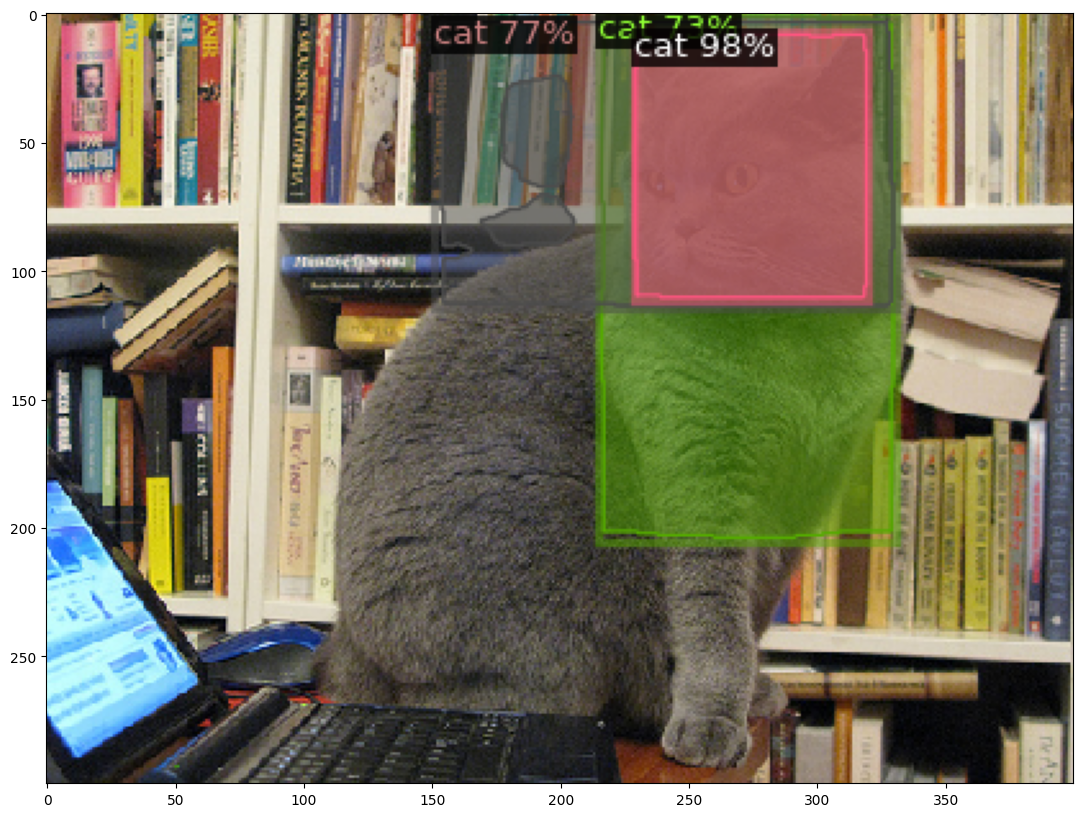

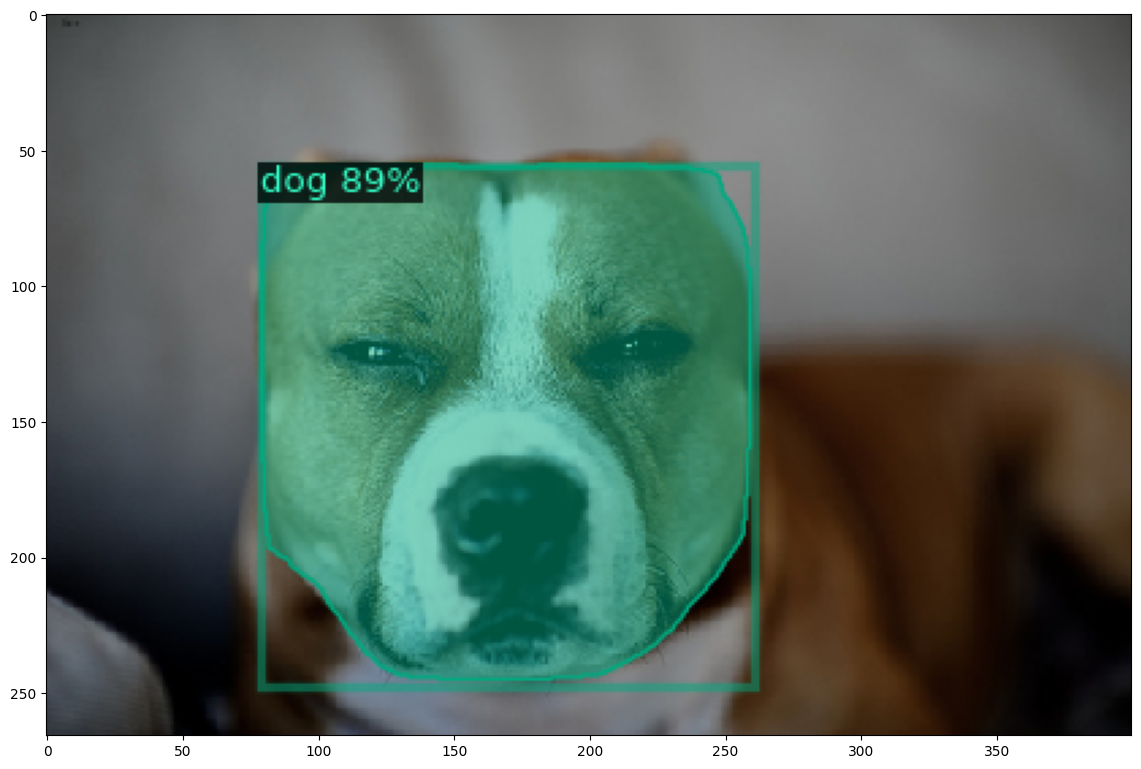

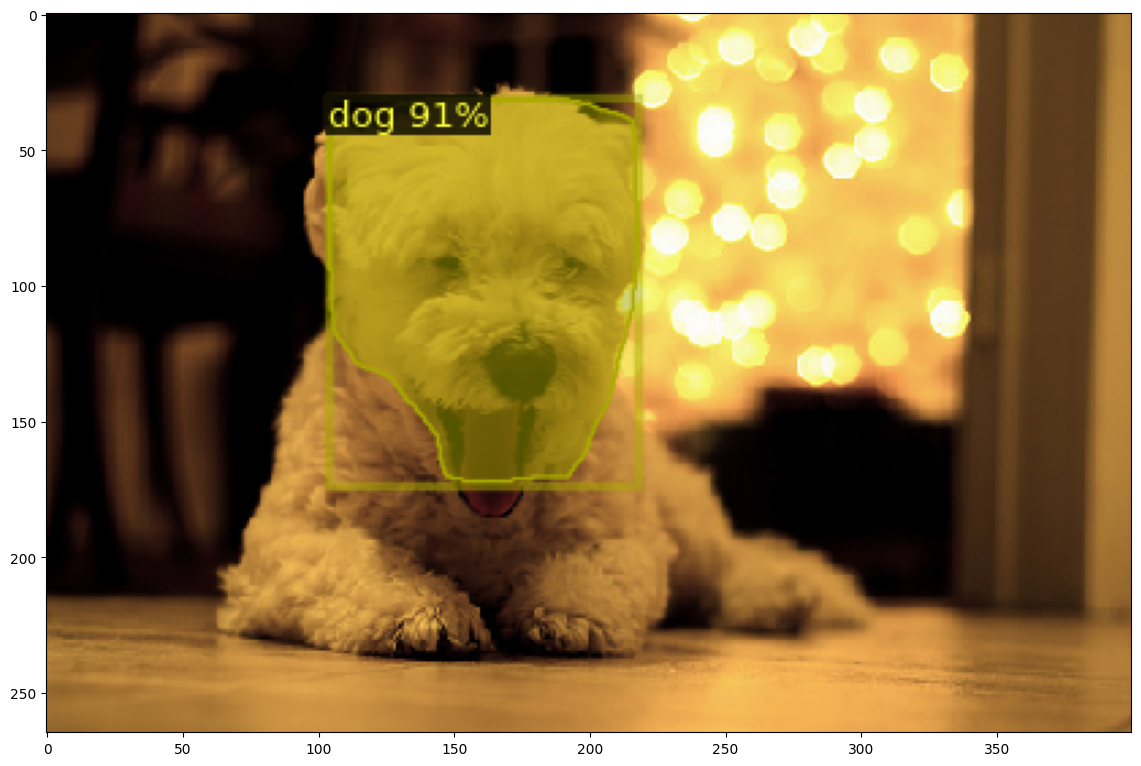

In [26]:
%cd src/Detectron2_Custom_Training/

import cv2
# Load trained model
import matplotlib.pyplot as plt

from detectron2.utils.visualizer import Visualizer

from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file("config.yml")

predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode
import random

%cd ..
%cd ..

dataset_dicts = get_detectron2data_dicts("research/data/data_split/valid")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=training_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

### Continue training

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("src/Detectron2/config.yml")
cfg.SOLVER.MAX_ITER = 1000

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
os.makedirs('src/Detectron2/output', exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

### Data Augmentation

In [6]:
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
import copy

def custom_mapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
    image = utils.read_image(dataset_dict["file_name"], format="BGR")
    transform_list = [
        T.Resize((800,600)),
        T.RandomBrightness(0.8, 1.8),
        T.RandomContrast(0.6, 1.3),
        T.RandomSaturation(0.8, 1.4),
        T.RandomRotation(angle=[90, 90]),
        T.RandomLighting(0.7),
        T.RandomFlip(prob=0.4, horizontal=False, vertical=True),
    ]
    image, transforms = T.apply_transform_gens(transform_list, image)
    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop("annotations")
        if obj.get("iscrowd", 0) == 0
    ]
    instances = utils.annotations_to_instances(annos, image.shape[:2])
    dataset_dict["instances"] = utils.filter_empty_instances(instances)
    return dataset_dict

In [15]:
from detectron2.engine import DefaultTrainer
from detectron2.data import build_detection_test_loader, build_detection_train_loader

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=custom_mapper)

##### Now, let's fine-tune a pretrained FasterRCNN object detection model to detect our balloons.

In [ ]:
# reset configuration with different model
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("research/data/data_split/train",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 500
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
os.makedirs('src/Detectron2/output', exist_ok=True)

In [16]:
trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/26 20:52:18 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

##### final step: Inference & evaluation using the trained model (similar to above)